<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666_2024/blob/main/read_my_sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
url = "https://jonnyhigham.com/ENVS666/shared_api.php"
response = requests.get(url)
data = response.json()

sensors = data['sensorInfo']
df = pd.DataFrame(sensors)

df

,sensor_id,Longitude,Latitude,Room,Mech Ventilation,Windows,Doors,start_date,end_date
0,J0820,-2.964790,53.401493,Kitchen,yes,3,3,2024-01-30 20:57:35,2024-02-13 08:51:12
1,jonny,-1.493676,53.357560,NULL,NULL,0,NULL,2024-01-04 18:10:00,2024-01-12 12:59:29
2,YN08,-2.975334,53.400534,Kitchen,yes,2,1,2024-02-13 11:24:54,2024-02-28 18:22:10
3,YP13,NULL,NULL,NULL,NULL,0,NULL,2024-02-13 13:23:36,2024-02-28 18:22:09
4,XT33,NULL,NULL,NULL,NULL,0,NULL,2024-02-13 13:43:32,2024-02-13 14:57:53
5,PU68,-2.984580,53.399145,Kitchen,yes,2,2,2024-02-13 13:02:56,2024-02-28 18:22:13
6,VT09,NULL,NULL,NULL,NULL,0,NULL,2024-02-13 12:10:58,2024-02-13 12:14:15
7,MR03,-3.435973,55.378051,Bedroom,no,1,1,2024-02-13 14:25:32,2024-02-28 18:22:40
8,NN18,-2.957963,53.408916,Kitchen,no,3,2,2024-02-13 13:08:35,2024-02-28 18:22:11
9,EH23,-2.927118,53.389180,Kitchen,yes,1,1,2024-02-13 15:32:25,2024-02-28 18:22:11


In [3]:
startDate = '2022-01-01'
endDate = '2024-02-31'
sensor = 'NN18'

url = "https://jonnyhigham.com/ENVS666/shared_api.php?sensor="+str(sensor)+"&startDate="+startDate+"&endDate="+endDate
response = requests.get(url)
data = response.json()
data = data['data']
df = pd.DataFrame(data)

print(url)

df

https://jonnyhigham.com/ENVS666/shared_api.php?sensor=NN18&startDate=2022-01-01&endDate=2024-02-31


,Timestamp,Temperature,Humidity,PM1.0,PM2.5,PM10.0
0,2024-02-13 13:08:35,23.4,0,10,16,20
1,2024-02-13 14:07:51,19.0,0,1,3,3
2,2024-02-13 14:08:00,19.4,0,1,3,3
3,2024-02-13 14:08:33,19.9,0,1,2,2
4,2024-02-13 14:09:06,20.2,0,1,2,4
...,...,...,...,...,...,...
30963,2024-02-28 18:20:29,22.4,0,124,200,220
30964,2024-02-28 18:21:02,22.0,0,149,238,268
30965,2024-02-28 18:21:36,21.7,0,74,117,124
30966,2024-02-28 18:22:11,21.4,0,103,166,186


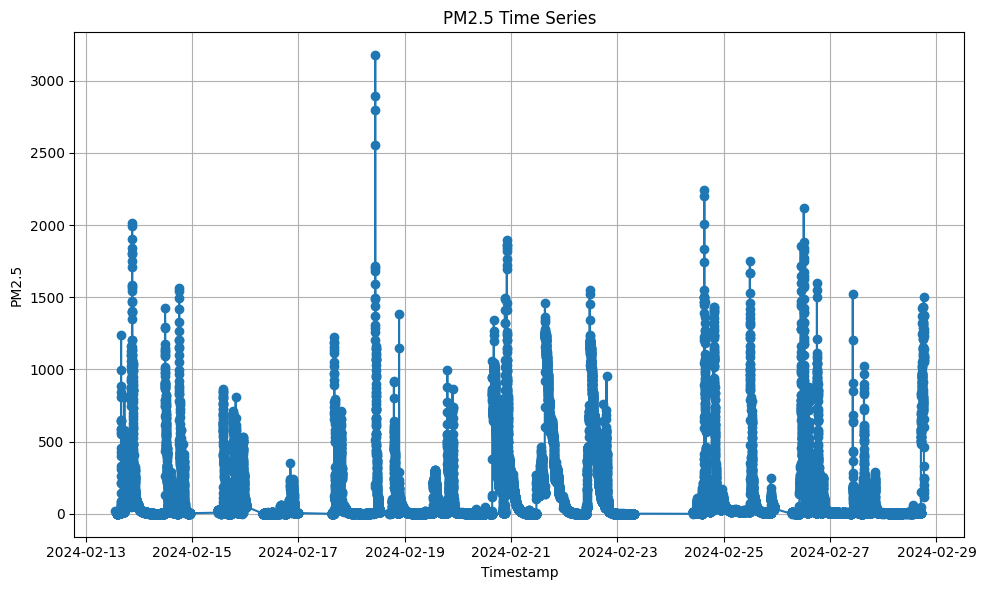

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Set 'Timestamp' as index
df.set_index('Timestamp', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM2.5'], marker='o', linestyle='-')
plt.title('PM2.5 Time Series')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()